# CS3033/CS6405 - Data Mining - Second Assignment

Samuel Punch - 116355346 - CS6405

### Submission

You should submit a single .ipnyb file with your python code and analysis electronically via Canvas. Please note that this assignment will account for 25 Marks of your module grade.


### Declaration

By submitting this assignment. I agree to the following:

<font color="red">“I have read and understand the UCC academic policy on plagiarism, and agree to the requirements set out thereby in relation to plagiarism and referencing. I confirm that I have referenced and acknowledged properly all sources used in the preparation of this assignment.
I declare that this assignment is entirely my own work based on my personal study. I further declare that I have not engaged the services of another to either assist me in, or complete this assignment”</font>Physical fatigue significantly impacts performance, safety, and health in domains such as sports, rehabilitation, and workplace ergonomics. Traditional methods for estimating fatigue, such as subjective self-reports, often lack accuracy and real-time applicability. Leveraging wearable sensors like Inertial Measurement Units (IMU) and Electromyography (EMG) provides objective biomechanical data, capturing kinematic and neuromuscular changes during repetitive or prolonged physical activities.

The provided dataset was collected from 27 physically active participants performing shoulder internal rotation (IR) and external rotation (ER) exercises at varying resistance levels (30-40%, 40-50%, and 50-60% of their maximal voluntary contraction).
Your task is to develop a regression-based machine learning model to estimate perceived fatigue (Borg RPE scores) using the provided sensor data.

## Data Preparation

In [1]:
import pandas as pd

file_id = '1DP3G49DWVUaRBkn7wssPi6CfY1pTmTQP'
url = f'https://drive.google.com/uc?id={file_id}'

df = pd.read_csv(url)

df.head()

,Subject,Repetition,X_Shoulder_acc_MPSD,X_Shoulder_acc_Freq_MPSD,X_Shoulder_acc_Power_Dominant_Band,X_Shoulder_acc_Ratio_Dominant_Band,X_Shoulder_acc_Total_LowFreq_Power,X_Shoulder_acc_Total_HighFreq_Power,X_Shoulder_acc_LowHigh_FreqRatio,X_Shoulder_acc_Total_Power,...,Magnitude_Palm_gyr_rtVar_Max,Magnitude_Palm_gyr_rtVar_Min,Magnitude_Palm_gyr_rtVar_Range,Magnitude_Palm_gyr_rtVar_RMS,Magnitude_Palm_gyr_rtVar_Energy,Magnitude_Palm_gyr_rtVar_IQR,Magnitude_Palm_gyr_rtVar_Skewness,Magnitude_Palm_gyr_rtVar_Kurtosis,RepetitionDuration_Palm_gyr_rtVar,Borg
0,1,1,2068.313,0.000,0.000,0.000,2318.602,154.645,14.993,2473.247,...,0.153,-0.170,0.324,0.051,0.797,0.059,-0.465,1.233,3.10,9.355
1,1,2,150.884,0.699,150.884,0.183,503.764,322.154,1.564,825.919,...,0.148,-0.196,0.344,0.056,0.892,0.064,-0.184,0.645,2.86,9.653
2,1,3,342.205,0.000,0.000,0.000,862.122,197.057,4.375,1059.179,...,0.104,-0.107,0.211,0.040,0.479,0.051,0.007,0.133,2.99,9.946
3,1,4,574.134,0.000,0.000,0.000,1007.744,195.604,5.152,1203.347,...,0.149,-0.177,0.325,0.056,0.908,0.069,-0.240,0.136,2.91,10.240
4,1,5,146.332,1.993,146.332,0.123,826.328,364.276,2.268,1190.603,...,0.160,-0.197,0.357,0.058,1.018,0.069,-0.144,0.439,3.01,10.536


<Axes: >

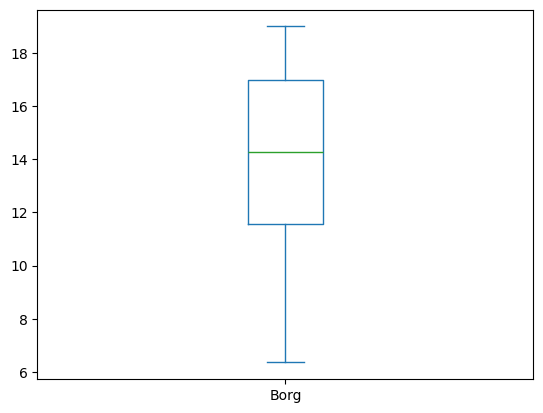

In [2]:
# Label or target variable
df['Borg'].plot.box()

# Tasks

## Basic models and evaluation

Using Scikit-learn, train and evaluate K-NN and decision tree regressors using 70% of the dataset from training and 30% for testing. For this part of the project, we are not interested in optimising the parameters; we just want to get an idea of the dataset.
Compare the results of both classifiers and comment on their execution time in the test.


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

# Load data
url = 'https://drive.google.com/uc?id=1DP3G49DWVUaRBkn7wssPi6CfY1pTmTQP'
df = pd.read_csv(url)

# Separate features and target
X = df.drop(columns=['Borg', 'Subject', 'Repetition'])  # Exclude metadata
y = df['Borg']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# K-NN Regressor
knn_start = time.time()
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
knn_train_time = time.time() - knn_start

knn_pred = knn.predict(X_test)
knn_mae = mean_absolute_error(y_test, knn_pred)
knn_mse = mean_squared_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)

# Decision Tree Regressor
dt_start = time.time()
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_train_time = time.time() - dt_start

dt_pred = dt.predict(X_test)
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

print("K-NN Results:")
print(f"MAE: {knn_mae:.2f}, MSE: {knn_mse:.2f}, R²: {knn_r2:.2f}, Time: {knn_train_time:.2f}s\n")

print("Decision Tree Results:")
print(f"MAE: {dt_mae:.2f}, MSE: {dt_mse:.2f}, R²: {dt_r2:.2f}, Time: {dt_train_time:.2f}s")

K-NN Results:
MAE: 2.03, MSE: 6.69, R²: 0.36, Time: 0.04s

Decision Tree Results:
MAE: 2.57, MSE: 11.36, R²: -0.08, Time: 6.81s


## Robust evaluation

In this section, try to improve the accuracy by creating a pipeline. Consider the techniques we have covered during the semester, and try to improve the accuracy of a Decision tree regressor.
Your report should provide concrete information of your reasoning; everything should be well-explained.
Do not get stressed if the things you try do not improve the accuracy. The key to getting good marks is to show that you evaluated different methods and that you correctly selected the configuration.


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Create pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('dt', DecisionTreeRegressor(random_state=42))
])

# Hyperparameter grid
param_grid = {
    'pca__n_components': [50, 100, 200],
    'dt__max_depth': [None, 10, 20],
    'dt__min_samples_split': [2, 5]
}

# Grid search
grid_search = GridSearchCV(pipe, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_dt = grid_search.best_estimator_
dt_opt_pred = best_dt.predict(X_test)
dt_opt_mae = mean_absolute_error(y_test, dt_opt_pred)
dt_opt_r2 = r2_score(y_test, dt_opt_pred)

print(f"Optimized Decision Tree MAE: {dt_opt_mae:.2f}, R²: {dt_opt_r2:.2f}")
print("Best Parameters:", grid_search.best_params_)

Optimized Decision Tree MAE: 2.55, R²: 0.01
Best Parameters: {'dt__max_depth': 10, 'dt__min_samples_split': 5, 'pca__n_components': 50}


## New classifier

Replicate the previous task for a classifier that we did not cover in class (different than K-NN and decision trees). Briefly describe and justify your choice.
Try to create the best model for the given dataset.






In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Pipeline
gb_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingRegressor(random_state=42))
])

# Parameter grid
gb_params = {
    'gb__n_estimators': [100, 200],
    'gb__learning_rate': [0.05, 0.1],
    'gb__max_depth': [3, 5]
}

# Grid search
gb_search = GridSearchCV(gb_pipe, gb_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
gb_search.fit(X_train, y_train)

# Evaluate
best_gb = gb_search.best_estimator_
gb_pred = best_gb.predict(X_test)
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)

print(f"Gradient Boosting MAE: {gb_mae:.2f}, R²: {gb_r2:.2f}")

## Evaluation on unseen instances (Only for CS6405)
Save your best model into your github. And create a single code cell that loads it and evaluate it on the following test dataset:
https://raw.githubusercontent.com/andvise/DM_Assignment_2425/refs/heads/main/test_data.csv

This link currently contains a sample of the training set. The real test set will be released after the submission. I should be able to run the code cell independently and load all the libraries you need as well.



In [ ]:
from joblib import dump, load
from io import BytesIO
import requests
import pandas as pd

# INSERT YOUR MODEL'S URL
mLink = 'https://github.com/andvise/my_model/raw/refs/heads/main/model.joblib'
mfile = BytesIO(requests.get(mLink).content)
model = load(mfile)

df = pd.read_csv("https://raw.githubusercontent.com/andvise/DM_Assignment_2425/refs/heads/main/test_data.csv")


In [ ]:
from joblib import dump, load
import requests
from io import BytesIO
import pandas as pd

# Save the best model (e.g., Gradient Boosting)
dump(best_gb, 'best_model.joblib')  # Upload this to GitHub

# Load model and test data
mLink = 'https://github.com/yourusername/yourrepo/raw/main/best_model.joblib'
mfile = BytesIO(requests.get(mLink).content)
model = load(mfile)

test_data = pd.read_csv("https://raw.githubusercontent.com/andvise/DM_Assignment_2425/main/test_data.csv")
X_unseen = test_data.drop(columns=['Borg', 'Subject', 'Repetition'])
y_unseen = test_data['Borg']

# Predict and evaluate
unseen_pred = model.predict(X_unseen)
mae = mean_absolute_error(y_unseen, unseen_pred)
print(f"MAE on Unseen Data: {mae:.2f}")